In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
hd=pd.read_csv('heart_disease.csv.txt')
hd.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No


In [2]:
hd['ChestPain']=hd.ChestPain.replace({'typical':1,'asymptomatic':2,'nonanginal':3,'nontypical':4})
hd['AHD']=hd.AHD.replace({'Yes':1,'No':0})
#hd=hd[['Age','Sex','ExAng','Oldpeak','Slope','Ca','Thal','Fbs','RestECG','RestBP','Chol','ChestPain','MaxHR','AHD']]
hd['Thal']=hd.Thal.replace({'normal':0,'fixed':1,'reversable':2})
hd.head(304)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0,1,0
2,67,1,2,160,286,0,2,108,1,1.5,2,3,0,1
3,67,1,2,120,229,0,2,129,1,2.6,2,2,2,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
5,41,0,4,130,204,0,2,172,0,1.4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0,2,1
300,68,1,2,144,193,1,0,141,0,3.4,2,2,2,1
301,57,1,2,130,131,0,0,115,1,1.2,2,1,2,1
302,57,0,4,130,236,0,2,174,0,0.0,2,1,0,1


In [3]:

hd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int64  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    int64  
 13  AHD        303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


In [4]:
hd.describe()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.537954,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,0.831683,0.458746
std,9.038662,0.467299,0.856053,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,2.000000,1.000000


<Axes: >

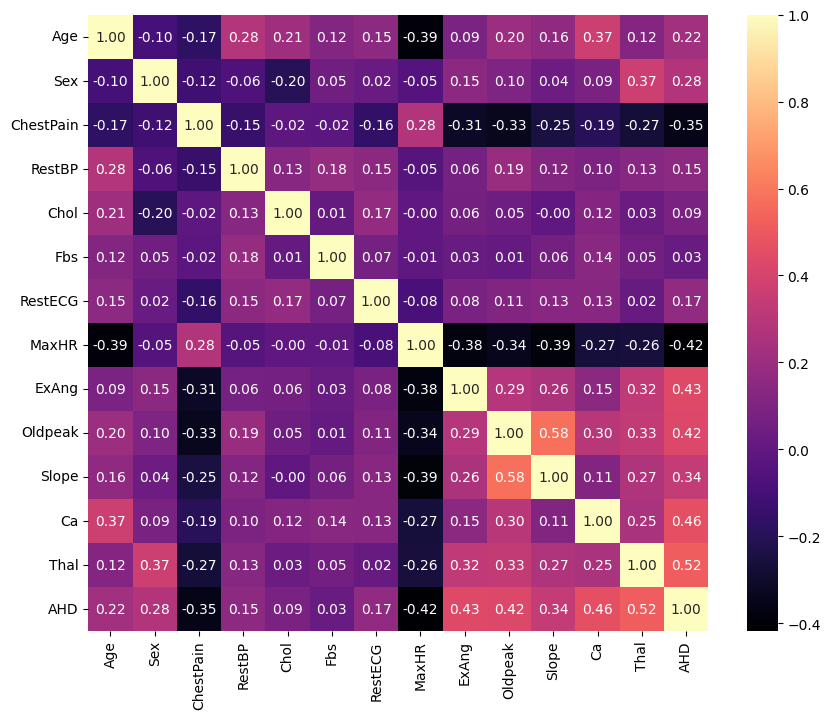

In [5]:
#Correlation of features
plt.figure(figsize=(10,8))
sns.heatmap(hd.corr(),annot=True,cmap="magma",fmt='.2f')

In [6]:
#Preparing the data sets
x=hd.iloc[:,:13]
y=hd.iloc[:,-1]
print(x)
y

     Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
1     63    1          1     145   233    1        2    150      0      2.3   
2     67    1          2     160   286    0        2    108      1      1.5   
3     67    1          2     120   229    0        2    129      1      2.6   
4     37    1          3     130   250    0        0    187      0      3.5   
5     41    0          4     130   204    0        2    172      0      1.4   
..   ...  ...        ...     ...   ...  ...      ...    ...    ...      ...   
299   45    1          1     110   264    0        0    132      0      1.2   
300   68    1          2     144   193    1        0    141      0      3.4   
301   57    1          2     130   131    0        0    115      1      1.2   
302   57    0          4     130   236    0        2    174      0      0.0   
303   38    1          3     138   175    0        0    173      0      0.0   

     Slope  Ca  Thal  
1        3   0     1  
2    

1      0
2      1
3      1
4      0
5      0
      ..
299    1
300    1
301    1
302    1
303    0
Name: AHD, Length: 303, dtype: int64

In [7]:
#Splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
print(x_train.shape)

(242, 13)


In [9]:
print(y_train.shape)

(242,)


In [10]:
print(x_test.shape)
print(y_test.shape)

(61, 13)
(61,)


In [11]:
#Training the model
from sklearn.linear_model import LogisticRegression
LOR=LogisticRegression()
LOR.fit(x_train,y_train)

C:\Users\Mugiwara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
#Predicting the outcome
predict=LOR.predict(x_test)

In [13]:
predict[:110]

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [14]:
print(y_test[:110])

100    0
297    1
90     0
31     0
235    0
      ..
174    0
95     0
162    1
217    0
92     1
Name: AHD, Length: 61, dtype: int64


In [15]:
#Predicting the accuracy of model
acc=LOR.score(x_test,y_test)
acc

0.7704918032786885

In [16]:
#Representing the confusion matrix
CM=confusion_matrix(y_test,predict)
print(CM)

[[28  9]
 [ 5 19]]
